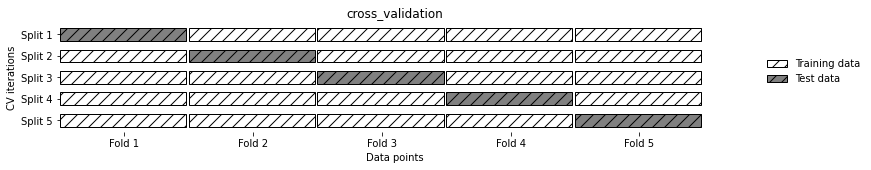

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import io
import os
import mglearn
import sys
import requests

mglearn.plots.plot_cross_validation()

In [2]:
# Import Neural Network packages from Deep Learning Directory
from DeepLearning import Keras_CNN1D as CNN
from DeepLearning import Keras_FFNN as FFNN
from DeepLearning import Keras_LSTM as LSTM
from DeepLearning import Keras_MLP as MLP
from DeepLearning import ModularNN as mNN
from DeepLearning import Keras_Perceptron as Perceptron
from DeepLearning import Keras_RBF as RBF
from DeepLearning import Keras_RNN as RNN 
from DeepLearning import Keras_SNN as SNN

In [3]:
# Import Technical Application and Wavelet denoising functions
from pre_processing import ta_features as ta
from pre_processing import wavelet_fx as denoise

In [4]:
# Import neural network libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import BatchNormalization
from keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Import Graph libraries
import matplotlib.pyplot as plt

In [6]:
# urls = ['https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=monthly&maturity=10year&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=INFLATION&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=RETAIL_SALES&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=DURABLES&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=SIL8HCYZ96EI70FS',
#         'https://www.alphavantage.co/query?function=NONFARM_PAYROLL&apikey=SIL8HCYZ96EI70FS']

# api_data = []

# for ulr in api_urls:
#     response = requests.get(url)
#     api_data.append(response.json())
    
#     for key, value in data.items():
#         if isinstance(value, (int, float)):
#             data[key] = [value]
#     api_data.append(data)

# dfs = []
# for i, data in enumerate(api_data):
#     df = pd.DataFrame(data)
#     df.index = [i] * len(df)
#     dfs.append(df)
# merged_data = pd.concat(dfs)
# merged_data = pd.concat([pd.DataFrame(data) for data in api_data])

In [7]:
def import_dataframes_from_folder(folder_path):
    """
    Imports all CSV files from a folder with separator='\t' and returns a dictionary of dataframes.

    Parameters:
    folder_path (str): The path to the folder containing the CSV files.

    Returns:
    dict: A dictionary mapping CSV file names to their corresponding dataframes.
    """
    dataframes = {}
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df_name = filename[:-4]  # remove .csv extension from filename
            df = pd.read_csv(filepath, sep='\t')
            dataframes[df_name] = df
    return dataframes

data_daily = 'Historical_Data/Daily'
data_M1 = 'Historical_Data/M1_2019_01_01__2021_01_01_0000'
data_M5 = 'Historical_Data/M5_2019_01_01__2021_01_01_0000'
data_M10 = 'Historical_Data/M10_2019_01_01__2021_01_01_0000'
data_M15 = 'Historical_Data/M15_2019_06_15__2021_06_15_0000'
data_M30 = 'Historical_Data/M30_2018_01_01__2022_01_01_0000'
data_1H = 'Historical_Data/1H_2018_06_01__2022_06_01_0000'
data_6H = 'Historical_Data/6H_2014_01_01__2022_01_01_0000'
data_12H = 'Historical_Data/12H_2014_01_01__2022_01_01_0000'

dataframes_daily = import_dataframes_from_folder(data_daily)
dataframes_M1 = import_dataframes_from_folder(data_M1)
dataframes_M5 = import_dataframes_from_folder(data_M5)
dataframes_M10 = import_dataframes_from_folder(data_M10)
dataframes_M15 = import_dataframes_from_folder(data_M15)
dataframes_M30 = import_dataframes_from_folder(data_M30)
dataframes_H1 = import_dataframes_from_folder(data_1H)
dataframes_H6 = import_dataframes_from_folder(data_6H)
dataframes_H12 = import_dataframes_from_folder(data_12H)

In [8]:
print(dataframes_daily.keys())

data = dataframes_daily['EURCHF_Daily']
# data = data.drop(data.index[800:]) 

data = data.rename(columns = {'<DATE>':'Date','<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close','<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})

data = ta.TA_APPLICATION(data)

data['price_change'] = data['close'].diff()
volatility = np.std(data['price_change'])
print("Market volatility: ", volatility)
data

dict_keys(['EURCHF_Daily', 'EURGBP_Daily', 'EURJPY_Daily', 'EURUSD_Daily-Copy1', 'EURUSD_Daily', 'GBPCHF_Daily', 'GBPJPY_Daily', 'GBPUSD_Daily', 'USDCHF_Daily', 'USDJPY_Daily'])
Market volatility:  0.005204320409206377


,Date,open,high,low,close,tickvol,volume,spread,AOI,ROC,...,bb_bbhi,bb_bbli,EMA,MACD,MACD_diff,MACD_signal,SMA13,SMA21,SMA34,price_change
0,2014.01.01,1.22643,1.22776,1.22643,1.22729,1057,0,10,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014.01.02,1.22719,1.23201,1.22668,1.22915,49374,0,1,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00186
2,2014.01.03,1.22915,1.23118,1.22814,1.22956,26518,0,1,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00041
3,2014.01.06,1.23006,1.23325,1.22967,1.23188,29592,0,1,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00232
4,2014.01.07,1.23187,1.23810,1.23171,1.23794,27634,0,1,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2021.12.27,1.03870,1.04110,1.03870,1.03920,19992,0,1,-0.004321,-0.371975,...,0.0,0.0,1.041202,-0.002917,0.000570,-0.003487,1.040893,1.041183,1.044757,-0.00111
2060,2021.12.28,1.03916,1.03940,1.03690,1.03756,22786,0,0,-0.004245,-0.415591,...,0.0,0.0,1.040717,-0.002968,0.000415,-0.003383,1.040468,1.040963,1.044272,-0.00164
2061,2021.12.29,1.03756,1.03829,1.03622,1.03760,31595,0,0,-0.004721,-0.349583,...,0.0,0.0,1.040301,-0.002970,0.000330,-0.003300,1.040138,1.040785,1.043769,0.00004
2062,2021.12.30,1.03757,1.03841,1.03430,1.03430,30629,0,0,-0.005127,-0.528948,...,0.0,1.0,1.039501,-0.003202,0.000079,-0.003281,1.039605,1.040461,1.043190,-0.00330


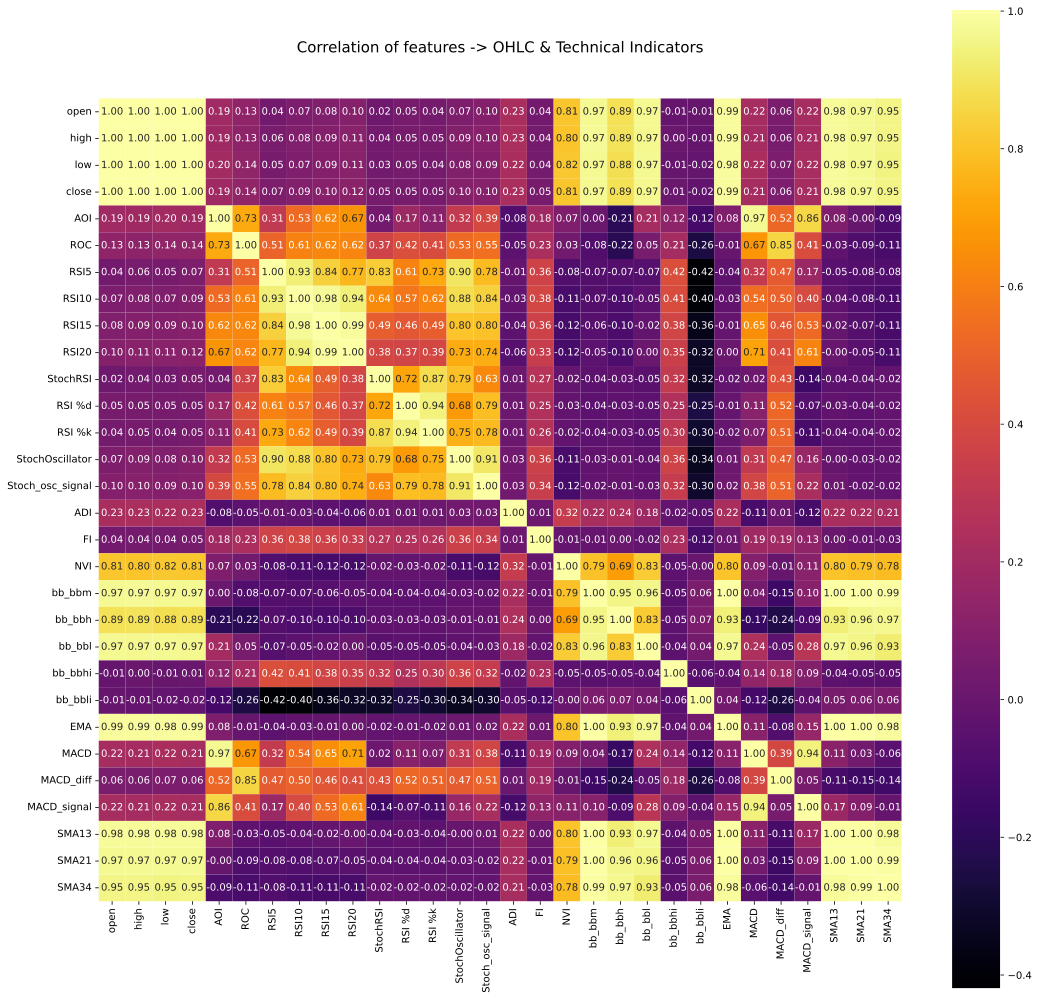

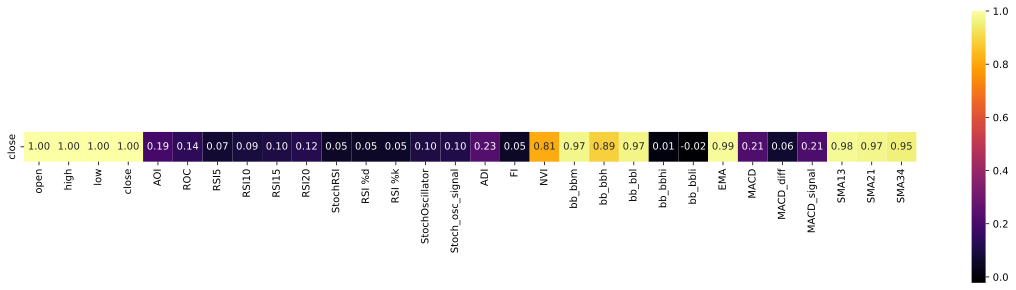

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.inferno

data = data.loc[:, ['open', 'high', 'low', 'close', 'AOI', 'ROC', 'RSI5', 'RSI10', 'RSI15', 'RSI20',
           'StochRSI','RSI %d','RSI %k','StochOscillator','Stoch_osc_signal','ADI','FI','NVI','bb_bbm','bb_bbh',
           'bb_bbl','bb_bbhi','bb_bbli','EMA','MACD','MACD_diff','MACD_signal','SMA13','SMA21','SMA34']]

plt.figure(figsize=(18,18))
plt.title('Correlation of features -> OHLC & Technical Indicators', y=1.05, size=15)
sns.heatmap(data.corr(), linewidths=0.05, vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True, fmt='.2f')
plt.savefig('heatmap1.png')
plt.show()

plt.figure(figsize=(20,5))
corr = data.corr()
sns.heatmap(corr[corr.index == 'close'], linewidths=0.05, vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True, fmt='.2f');

In [9]:
# print(dataframes.keys())
# data = dataframes['EURCHF_Daily']
# data

processed_data = dataframes_daily['EURCHF_Daily']

processed_data = processed_data.rename(columns = {'<DATE>':'Date','<OPEN>':'Open', '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close','<TICKVOL>':'tickvol','<VOL>':'volume','<SPREAD>':'spread'})

processed_data['open_wave'],processed_data['high_wave'],processed_data['low_wave'],\
processed_data['close_wave']=denoise.denoising([processed_data['Open'],processed_data['High'],processed_data['Low'],processed_data['Close']])

processed_data = processed_data[['open_wave', 'high_wave', 'low_wave', 'close_wave', 'tickvol', 'volume', 'spread']]
processed_data = ta.TA_WAVE_APPLICATION(processed_data)
processed_data

,open_wave,high_wave,low_wave,close_wave,tickvol,volume,spread,AOI,ROC,RSI5,...,bb_bbl,bb_bbhi,bb_bbli,EMA,MACD,MACD_diff,MACD_signal,SMA13,SMA21,SMA34
0,1.173057,1.174995,1.171315,1.172891,1057,0,10,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.179905,1.181992,1.177986,1.179750,49374,0,1,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.187103,1.189354,1.184990,1.186961,26518,0,1,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.193045,1.195417,1.190791,1.192912,29592,0,1,NaN,NaN,NaN,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.197560,1.200005,1.195228,1.197433,27634,0,1,NaN,NaN,100.000000,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,1.143945,1.145351,1.142784,1.143751,19992,0,1,0.031538,3.642911,99.999881,...,1.082498,1.0,0.0,1.121842,0.011776,0.003200,0.008576,1.120160,1.111366,1.102866
2060,1.149165,1.150657,1.147913,1.148978,22786,0,0,0.034460,3.946265,99.999911,...,1.082521,1.0,0.0,1.125460,0.012887,0.003449,0.009438,1.123655,1.114040,1.104668
2061,1.154659,1.156245,1.153309,1.154477,31595,0,0,0.037507,4.264010,99.999933,...,1.082629,1.0,0.0,1.129329,0.014049,0.003689,0.010360,1.127433,1.116928,1.106627
2062,1.160392,1.162073,1.158946,1.160208,30629,0,0,0.040643,4.590491,99.999949,...,1.082846,1.0,0.0,1.133446,0.015257,0.003917,0.011340,1.131506,1.120035,1.108751


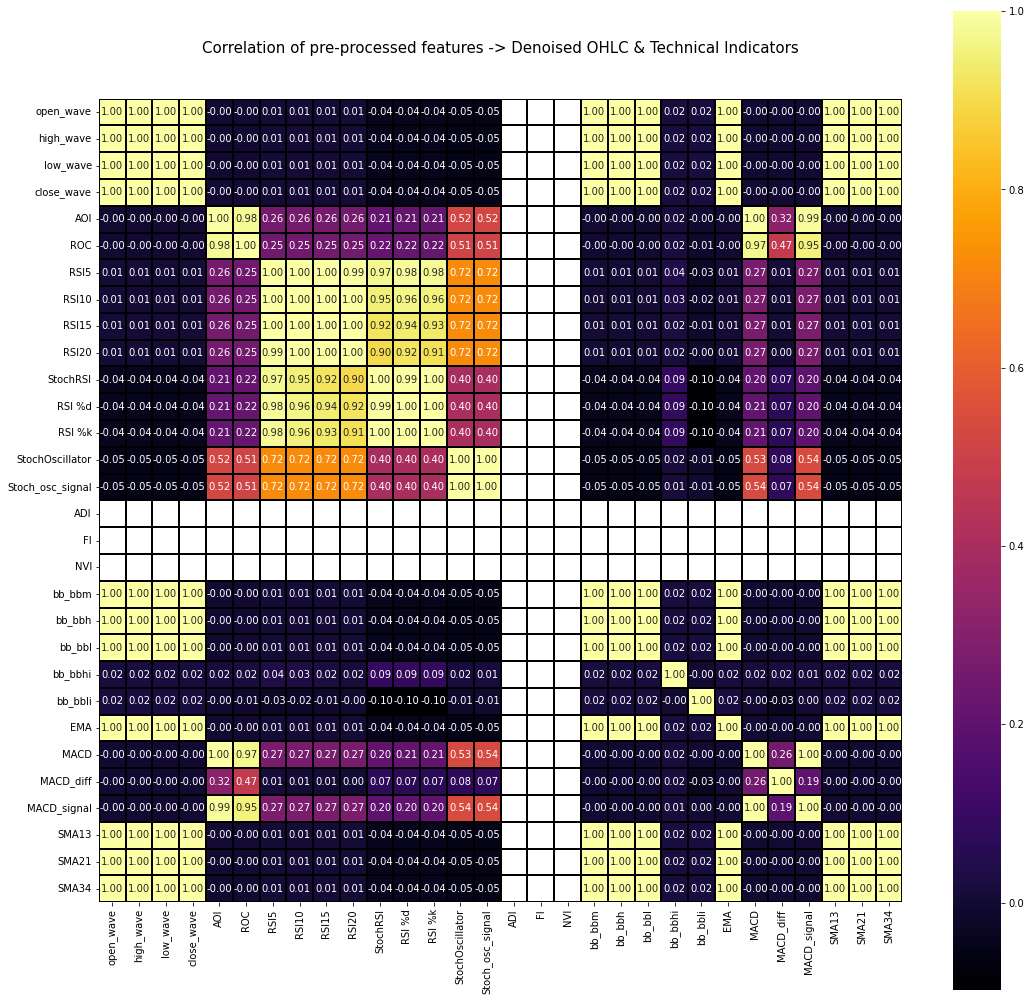

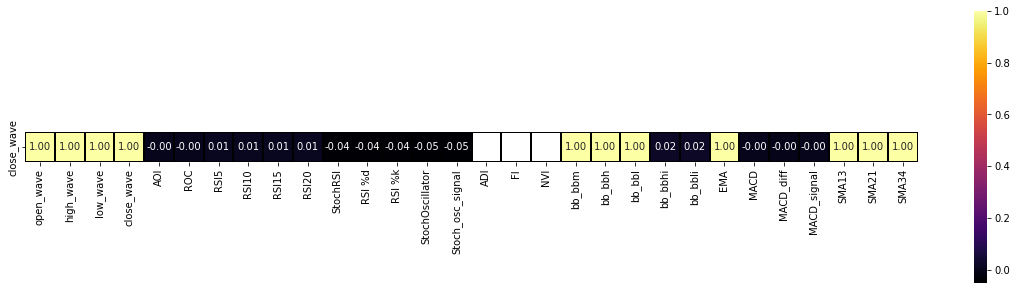

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

colormap = plt.cm.inferno
"""
fig, axes = plt.subplots(2, 2, figsize=(15,15), sharex=False, squeeze=False)

axes[0,0].set_title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(data.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, ax=axes[0,0])
corr = data.corr()
sns.heatmap(corr[corr.index == 'close'], linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, ax=axes[1,0]);
plt.show()
"""

processed_data = processed_data.loc[:, ['open_wave', 'high_wave', 'low_wave', 'close_wave', 'AOI', 'ROC', 'RSI5', 'RSI10', 'RSI15', 'RSI20',
           'StochRSI','RSI %d','RSI %k','StochOscillator','Stoch_osc_signal','ADI','FI','NVI','bb_bbm','bb_bbh',
           'bb_bbl','bb_bbhi','bb_bbli','EMA','MACD','MACD_diff','MACD_signal','SMA13','SMA21','SMA34']]


plt.figure(figsize=(18,18))
plt.title('Correlation of pre-processed features -> Denoised OHLC & Technical Indicators', y=1.05, size=15)
sns.heatmap(processed_data.corr(), linewidths=0.05, vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True, fmt='.2f')
plt.savefig('heatmap1.png')
plt.show()

plt.figure(figsize=(20,5))
corr = processed_data.corr()
sns.heatmap(corr[corr.index == 'close_wave'], linewidths=0.05, vmax=1.0, square=True, cmap=colormap, linecolor='black', annot=True, fmt='.2f');

In [16]:
# Set up window for rolling data
def window_data(data, window, feature_col_numbers, target_col_number):
    X = []
    y = []
    for i in range(len(data) - window - 1):
        features = data.iloc[i:(i + window), feature_col_numbers]
        target = data.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

# Window settings for tuning
window_size = 1
# feature_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]
# feature_columns = [0,1,2,3,18,22,21,22,23,26,30,31,32]
feature_columns = [1,2,3,4]

# feature_columns = [2,3,4,5]
# feature_columns = [1,2,3,4,19,23,22,23,24,27,31,32,33]

target_column = 4

X, y = window_data(data, window_size, feature_columns, target_column)

# Print target variable and selected features
print(f"Target variable: {data.columns[target_column]}")
print("Selected features:")
for col in feature_columns:
    print(data.columns[col])
    
# Use 80% of the data for training and the remaineder for testing
split = int(0.8 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X_train.reshape(-1, len(feature_columns)))
X_train = scaler.transform(X_train.reshape(-1, len(feature_columns)))
X_test = scaler.transform(X_test.reshape(-1, len(feature_columns)))
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


from sklearn.impute import SimpleImputer

# Fill NaN values with mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print(np.isnan(X_train).any())
print(np.isnan(X_test).any())
print(np.isinf(X_train).any())
print(np.isinf(X_test).any())

X_train.shape, y_test.shape

Target variable: close
Selected features:
open
high
low
close
False
False
False
False


((1649, 4), (413, 1))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 4, 100)            40800     
                                                                 
 batch_normalization_9 (Batc  (None, 4, 100)           400       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 4, 100)            0         
                                                                 
 lstm_13 (LSTM)              (None, 4, 100)            80400     
                                                                 
 batch_normalization_10 (Bat  (None, 4, 100)           400       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 4, 100)           

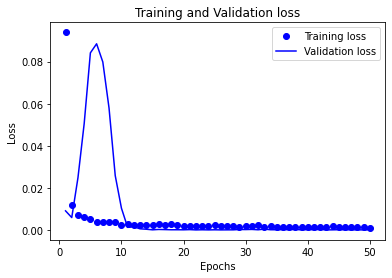

Mean test loss: 0.00023708161895174702
13/13 [==============================] - 0s 3ms/step
1.5485250664416603e-05


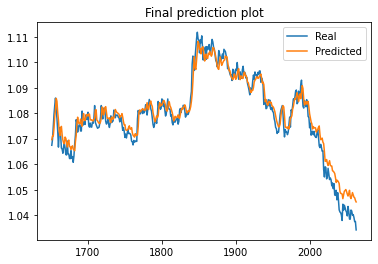

In [17]:
from DeepLearning import Keras_LSTM as LSTM 
from sklearn.metrics import mean_squared_error
from keras.callbacks import ModelCheckpoint, EarlyStopping

train_loss_list = []
val_loss_list = []
test_loss_list = []

num_runs = 1

for i in range(num_runs):
    # Create new model for each run 
    model = LSTM.Keras_LSTM(input_shape=(X_train.shape[1], 1), output_units=1, hidden_layers=3,
                          units=100, dropout_rate=0.2)
    model.summary()
    # Train the model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

    # Collect training and validation loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Evaluate the model on test data
    y_pred = model.predict(X_test)
    test_loss = mean_squared_error(y_test, y_pred)

    # Append to corresponding list
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    test_loss_list.append(test_loss)
    
    # Calculate the mean performance metrics
    train_loss_mean = np.mean(train_loss_list, axis=0)
    val_loss_mean = np.mean(val_loss_list, axis=0)
    test_loss_mean = np.mean(test_loss_list, axis=0)

    # Calculate metrics for this run
    train_loss_run = train_loss_list[-1][-1]
    val_loss_run = val_loss_list[-1][-1]
    test_loss_run = test_loss_list[-1]
    
    epochs = range(1, len(train_loss)+1)

    plt.plot(epochs, train_loss_list[-1], 'bo', label='Training loss')
    plt.plot(epochs, val_loss_list[-1],'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    print(f"Mean test loss: {test_loss_mean}")

# Make some predictions
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
forex = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = data.index[-len(real_prices): ]) 

plot = forex.plot.line()
plot.set_title(f'Final prediction plot')
error = mean_squared_error(real_prices, predicted_prices)
print(error)

1/1 [==============================] - 0s 17ms/step


Text(0.5, 1.0, 'Final prediction plot with next 100 values')

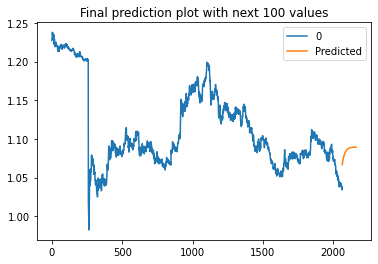

In [19]:
# Number of future predictions
n_steps = 100

# Get the last window of data from the training set
x_input = X_train[-1].reshape((1, len(feature_columns), 1))

# Predict the next n_steps values
future_preds = []
for i in range(n_steps):
    # Make a prediction using the model
    yhat = model.predict(x_input)
    future_preds.append(yhat[0][0])
    
    # Append the prediction to the input data for the next iteration
    x_input = np.append(x_input[:,1:,:], yhat.reshape((1, 1, 1)), axis=1)

# Inverse transform the predictions and plot the results
future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))
future_index = pd.date_range(start=data.index[-1], periods=n_steps+1, freq='D')[1:]
future_df = pd.DataFrame(future_preds, index=future_index, columns=['Predicted'])

plot = pd.concat([data['close'], future_df], axis=0).plot.line()
plot.set_title(f'Final prediction plot with next {n_steps} values')

In [66]:
# Define the number of future predictions
num_predictions = 10

# Use the last window_size values from the original data as the initial input
input_data = data[-window_size:][data.columns[feature_columns]].values.reshape(1, window_size, len(feature_columns))

# Initialize a list to store the predicted values
predicted_values = []

# Loop through the number of predictions
for i in range(num_predictions):
    # Make a prediction based on the current input
    predicted_value = model.predict(input_data)
    # Add the predicted value to the list of predicted values
    predicted_values.append(predicted_value[0][0])
    # Update the input data with the predicted value and shift the window by one
    input_data = np.roll(input_data, -1, axis=1)
    input_data[0, -1, 0] = predicted_value[0][0]
    
# Create an array of the predicted values
predicted_values = np.array(predicted_values).reshape(-1, 1)

# Invert the scaling of the predicted values
predicted_values = scaler.inverse_transform(predicted_values)

# Create a new index for the predicted values
index = pd.date_range(data.index[-1], periods=num_predictions+1, freq='H')[1:]

# Create a DataFrame of the predicted values
predicted_df = pd.DataFrame(data=predicted_values, index=index, columns=[data.columns[target_column]])

# Print the predicted values
print(predicted_df)

InvalidArgumentError: Graph execution error:

Specified a list with shape [?,1] from a tensor with shape [1,4]
	 [[{{node TensorArrayUnstack/TensorListFromTensor}}]]
	 [[sequential_12/lstm_48/PartitionedCall]] [Op:__inference_predict_function_835561]

In [ ]:
import tensorflow
from sklearn.model_selection import GridSearchCV
# from DeepLearning import Keras_LSTM as LSTM 
from sklearn.metrics import mean_squared_error
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization

param_grid = {
            'hidden_layers': [1,2],
            'units': [32,64],
            'dropout_rate': [0.1,0.2],
            'batch_size': [32, 64],
            'epochs': [10, 20]
        }

class Keras_LSTM:
    def __init__(self, input_shape, output_units, hidden_layers, units, dropout_rate):
        self.input_shape = input_shape
        self.output_units = output_units
        self.hidden_layers = hidden_layers
        self.units = units
        self.dropout_rate = dropout_rate
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        
        # Input layer
        model.add(LSTM(units=self.units, input_shape=self.input_shape, return_sequences=True))
        model.add(BatchNormalization())
        model.add(Dropout(rate=self.dropout_rate))
        
        # Hidden layers
        for i in range(self.hidden_layers - 1):
            model.add(LSTM(units=self.units, return_sequences=True))
            model.add(BatchNormalization())
            model.add(Dropout(rate=self.dropout_rate))
        
        # Output layer
        model.add(LSTM(units=self.output_units))
        model.add(Dense(units=self.output_units))
        
        # Compile the model
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    def fit(self, X_train, y_train, epochs, batch_size, validation_data=None):
        history = self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                      validation_data=validation_data)
        return history
    
    def predict(self, X_test):
        return self.model.predict(X_test)
    
    def summary(self):
        self.model.summary()
train_loss_list = []
val_loss_list = []
test_loss_list = []

num_runs = 1

for i in range(num_runs):
    # Create new model for each run    
        model = Keras_LSTM(input_shape=(X_train.shape[1], 1), output_units=1, hidden_layers=3,
                              units=100, dropout_rate=0.2)
        model.summary()
        # Train the model
        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
        
        # Collect training and validation loss
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        # Evaluate the model on test data
        y_pred = model.predict(X_test)
        test_loss = mean_squared_error(y_test, y_pred)
        
        # Append to corresponing list
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        test_loss_list.append(test_loss)
        
        model = KerasRegressor(build_fn=Keras_LSTM, verbose=0)

        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        print("Best hyperparameters: ", grid_search.best_params_)
        print("R^2 score: ", grid_search.best_score_)

# # Calculate the mean performance metrics
# train_loss_mean = np.mean(train_loss_list, axis=0)
# val_loss_mean = np.mean(val_loss_list, axis=0)
# test_loss_mean = np.mean(test_loss_list, axis=0)

# epochs = range(1, len(train_loss)+1)

# plt.plot(epochs, train_loss_list[-1], 'bo', label='Training loss')
# plt.plot(epochs, val_loss_list[-1],'b', label='Validation loss')
# plt.title('Training and Validation loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# print(f"Mean test loss: {test_loss_mean}")

In [ ]:
# Make some predictions
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
forex = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = data.index[-len(real_prices): ]) 
forex.head()

plot = forex.plot.line()

from sklearn.metrics import mean_squared_error

erro = mean_squared_error(real_prices, predicted_prices)
print(erro)

# 13/13 [==============================] - 0s 6ms/step
# 1.769305842759387e-05 25e
# 13/13 [==============================] - 0s 16ms/step
# 3.848395975473077e-06 100 e

# 13/13 [==============================] - 0s 36ms/step
# 1.128348603556857e-05 100e ta_fx 

# 13/13 [==============================] - 0s 8ms/step
# 1.574558439499924e-06 e100 fOHLC 

In [ ]:
from DeepLearning import Keras_FFNN as FFNN
from sklearn.metrics import mean_squared_error

train_loss_list = []
val_loss_list = []
test_loss_list = []

num_runs = 1

for i in range(num_runs):
    # Create new model for each run 
        model = FFNN.Keras_FFNN(input_shape=(X_train.shape[1], 1), output_units=1, hidden_layers=3,
                              units=100, dropout_fraction=0.2)
        
        # Train the model
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
        
        # Collect training and validation loss
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        # Evaluate the model on test data
        y_pred = model.predict(X_test)
        test_loss = mean_squared_error(y_test.flatten(), y_pred.flatten())
        
        # Append to corresponing list
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        test_loss_list.append(test_loss)

# Calculate the mean performance metrics
train_loss_mean = np.mean(train_loss_list, axis=0)
val_loss_mean = np.mean(val_loss_list, axis=0)
test_loss_mean = np.mean(test_loss_list, axis=0)

epochs = range(1, len(train_loss)+1)

plt.plot(epochs, train_loss_list[-1], 'bo', label='Training loss')
plt.plot(epochs, val_loss_list[-1],'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Mean test loss: {test_loss_mean}")


In [ ]:
# Make some predictions
predicted = model.predict(X_test)
predicted = np.reshape(predicted, (predicted.shape[0]*predicted.shape[1], 1))
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
# Create a DataFrame of Real and Predicted values
forex = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = data.index[-len(real_prices): ]) 
forex.head()

plot = forex.plot.line()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_prices, predicted_prices)
print(f"Mean Squared Error: {mse}")